
# SECTION 1 - Questions to Answer

Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  

Predicting a disease accurately can help the healthcare professionals to decide the line of treatment to be given to the patients. Along with that, it can also help improve patient outcomes and reduce costs. Personalised healthcare can be enhanced using AI and machine learning.
Currently the treatment line or drugs are prescribed based on limited data. AI can help healthcare professionals to accurately diagnose the patients. As each patient's health state is different, they can decide the most effective course of treatment hence enhacing the personalised treatment as well.

How is it going to impact the medical field when it comes to effective screening and reducing health care burden.

AI can enhance the accuracy disgnostic tools which play a vital role in screening. AI can identify the people who are at higher risk of getting a disease resulting in early start of treatment and or avoiding the disease at earlierst.
Using the data and outcomes of the past patients, we can identify the trends and patterns and diagnose the current patients even more accurately.

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

We see a lot of missing / incorectly entered values in the dataset. If we overcome the problem of missing data and incorrectly stored data, we can solve a lot of problems faced during ML.

Hypothesis

Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome.The purpose of this study was to develop nad implement a model that would classify the patients as Covid Positive Or Covid Negative

# Analysis and ML

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading the dataset
data=pd.read_csv("corona_tested_006.csv")

In [ ]:
data.shape

(278848, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
data.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
data.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [ ]:
data.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [ ]:
data.drop_duplicates() # dropping the duplicates if any

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [ ]:
data.shape # Checking data shape after dropping duplicates

(278848, 11)

There were no duplicates

In [ ]:
data.describe(include = 'all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
data.replace({'None': np.nan}, inplace=True) #Replacing None with Nan values


In [ ]:
data.replace({'other': np.nan}, inplace=True) #Replacing other with Nan values

In [ ]:
#The values for symptoms are represeted in more than two values(it should be true and false). Hence making the representation uniform
def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [ ]:
data['Cough_symptoms'] = data['Cough_symptoms'].map(convert)
data['Fever'] = data['Fever'].map(convert)
data['Sore_throat'] = data['Sore_throat'].map(convert)
data['Shortness_of_breath'] = data['Shortness_of_breath'].map(convert)
data['Headache'] = data['Headache'].map(convert)

In [ ]:
data.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [ ]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,NaN,NaN,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Contact with confirmed


In [ ]:
data.isnull().sum() #After converting "none" and "other" with null values, checking the number of null values

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [ ]:
data_missing = data.isnull()
data_missing.mean() * 100 #percentage of null values

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  1.395742
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

In [ ]:
import missingno as msno # library to examine missing values

<Axes: >

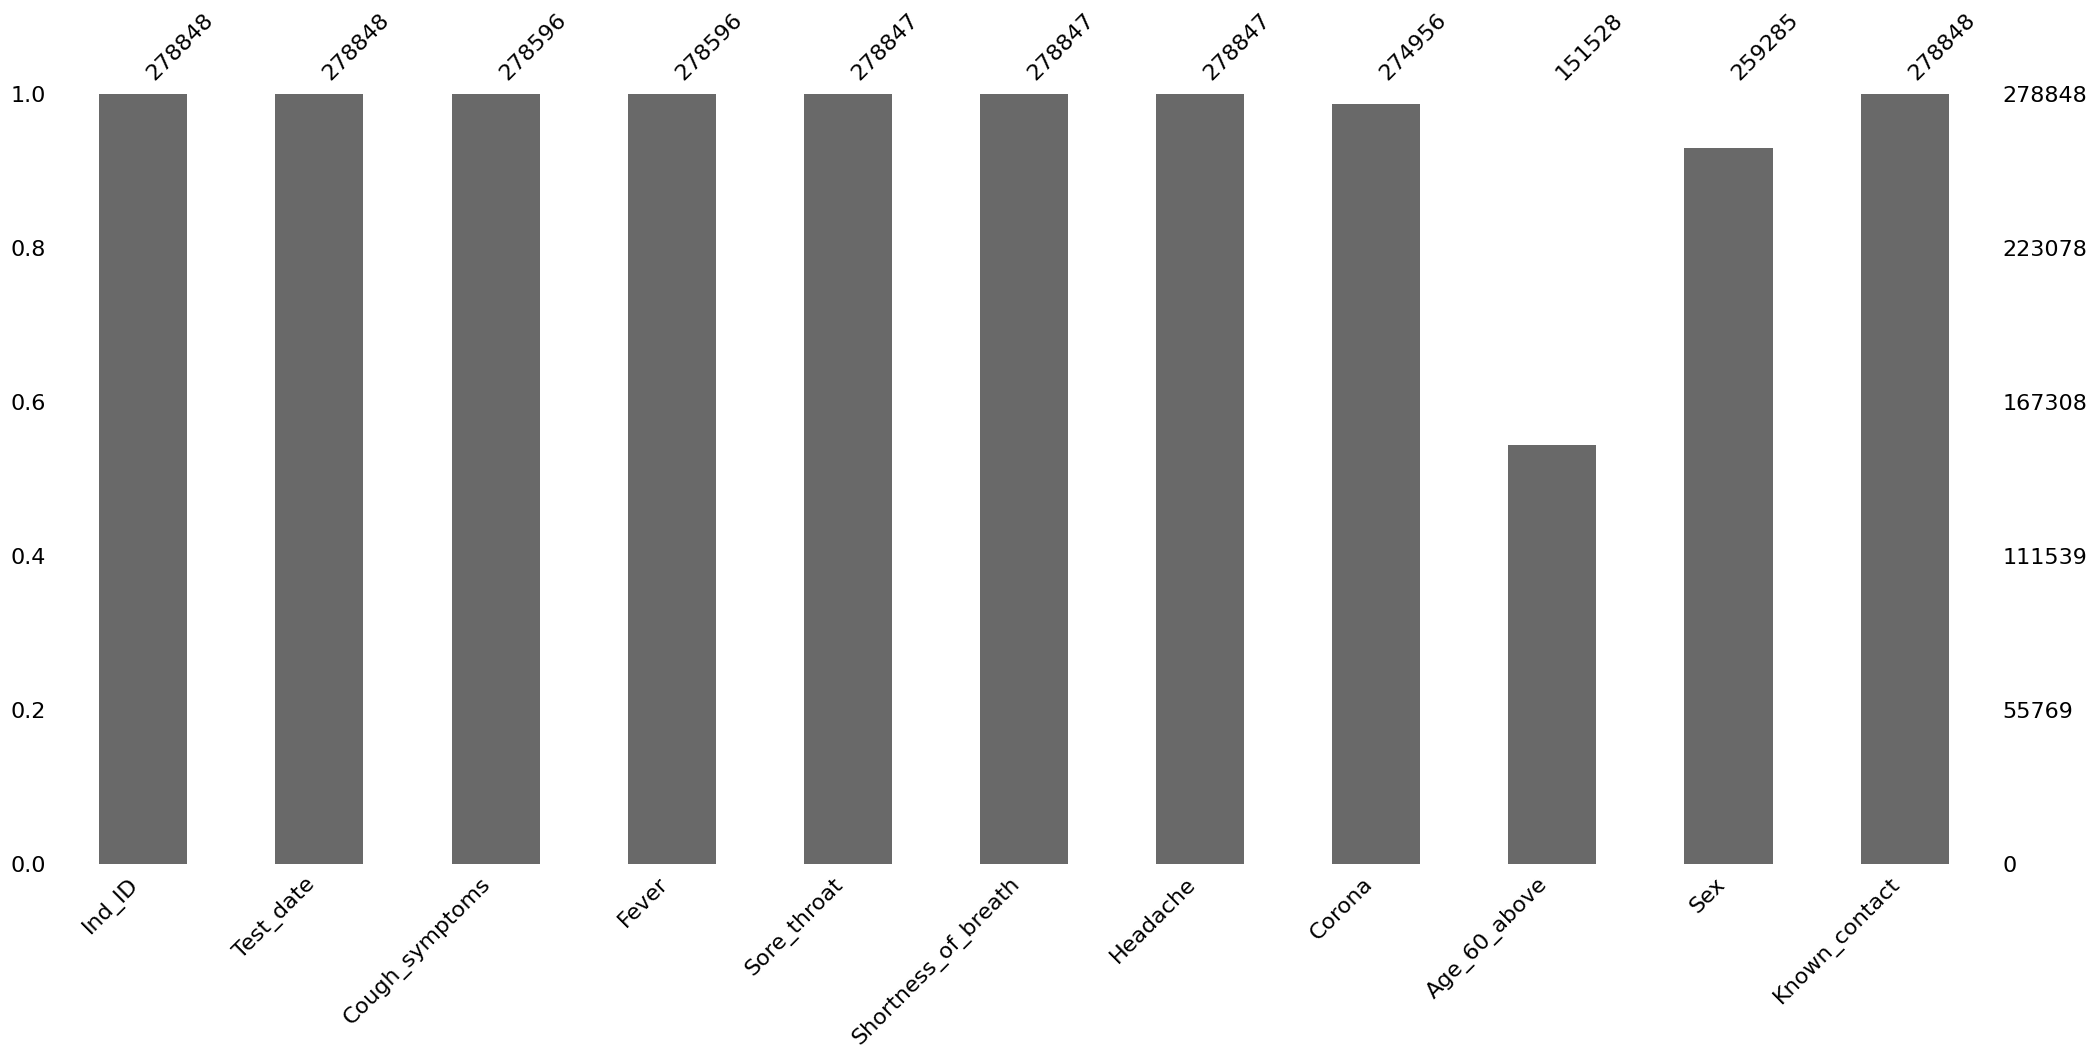

In [ ]:
msno.bar(data) #Visualising the null values

In [ ]:
c_data=data.copy(deep='True') #creating a copyy of cleaned data

In [ ]:
c_data.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache', ],axis=0,inplace=True) #dropping the null values

In [ ]:
c_data.drop('Age_60_above',axis=1,inplace=True)

In [ ]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278594 non-null  int64 
 1   Test_date            278594 non-null  object
 2   Cough_symptoms       278594 non-null  object
 3   Fever                278594 non-null  object
 4   Sore_throat          278594 non-null  object
 5   Shortness_of_breath  278594 non-null  object
 6   Headache             278594 non-null  object
 7   Corona               274702 non-null  object
 8   Sex                  259042 non-null  object
 9   Known_contact        278594 non-null  object
dtypes: int64(1), object(9)
memory usage: 23.4+ MB


In [ ]:
c_data.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                  3892
Sex                    19552
Known_contact              0
dtype: int64

In [ ]:
c_data.nunique()

Ind_ID                 278594
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Sex                         2
Known_contact               3
dtype: int64

Univariate, Bivariate and Multivariate Analysis

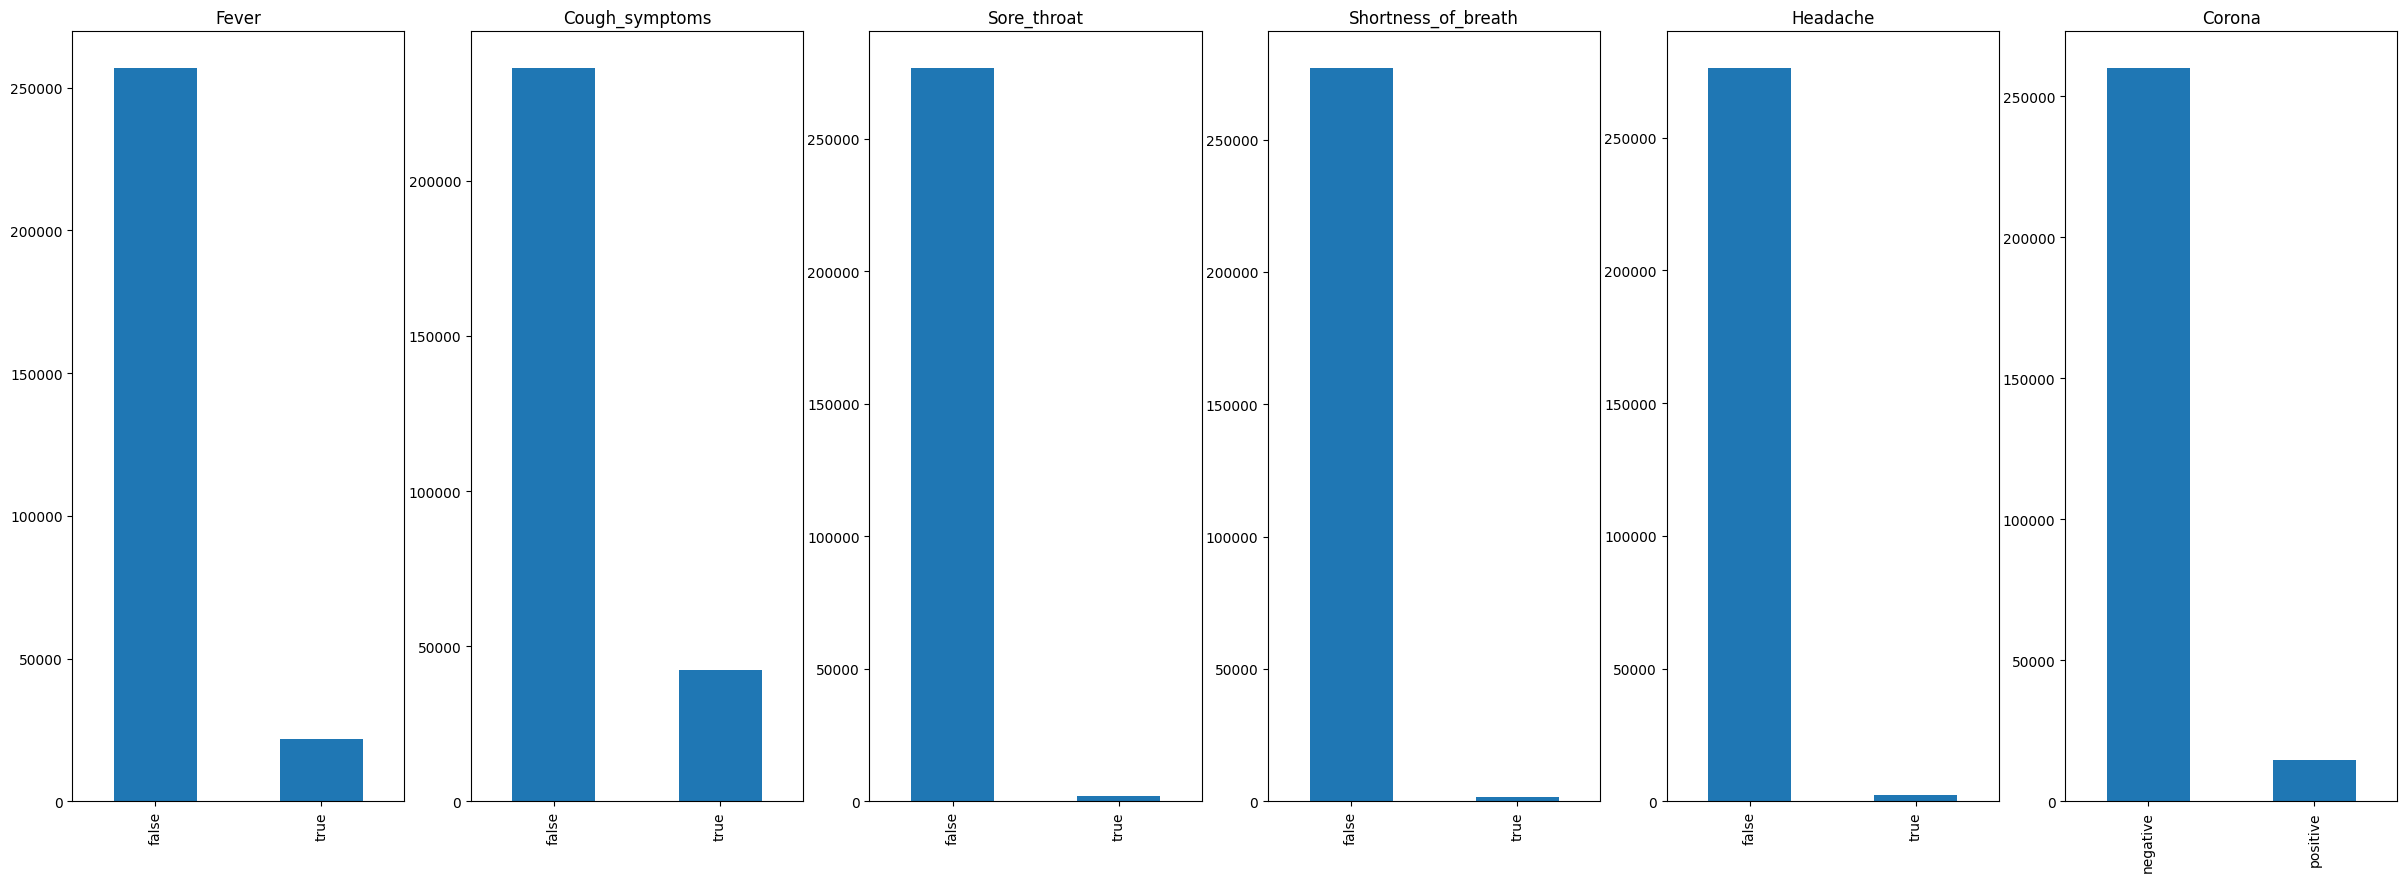

In [ ]:
Cols= ["Fever", "Cough_symptoms", "Sore_throat", "Shortness_of_breath", "Headache", "Corona"]
fig, ax = plt.subplots(1, len(Cols), figsize=(30, 10))
for i, cols in enumerate(c_data[Cols]):
    c_data[cols].value_counts().plot(kind = "bar", ax=ax[i]).set_title(cols)
fig.show()

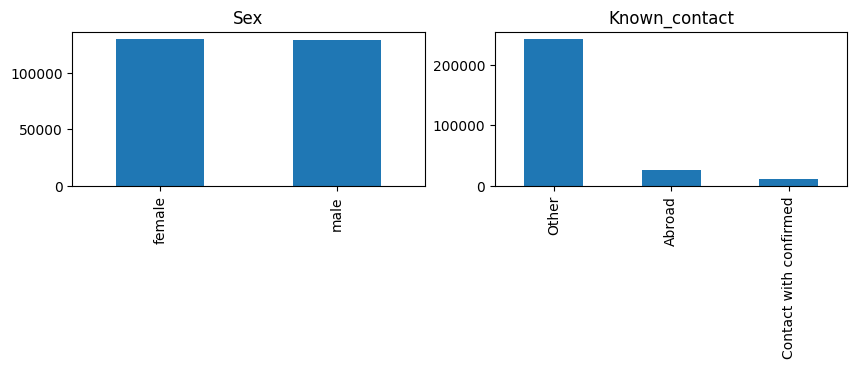

In [ ]:
Cols= ["Sex", "Known_contact"]
fig, ax = plt.subplots(1, len(Cols), figsize=(10, 2))
for i, cols in enumerate(c_data[Cols]):
    c_data[cols].value_counts().plot(kind = "bar", ax=ax[i]).set_title(cols)
fig.show()

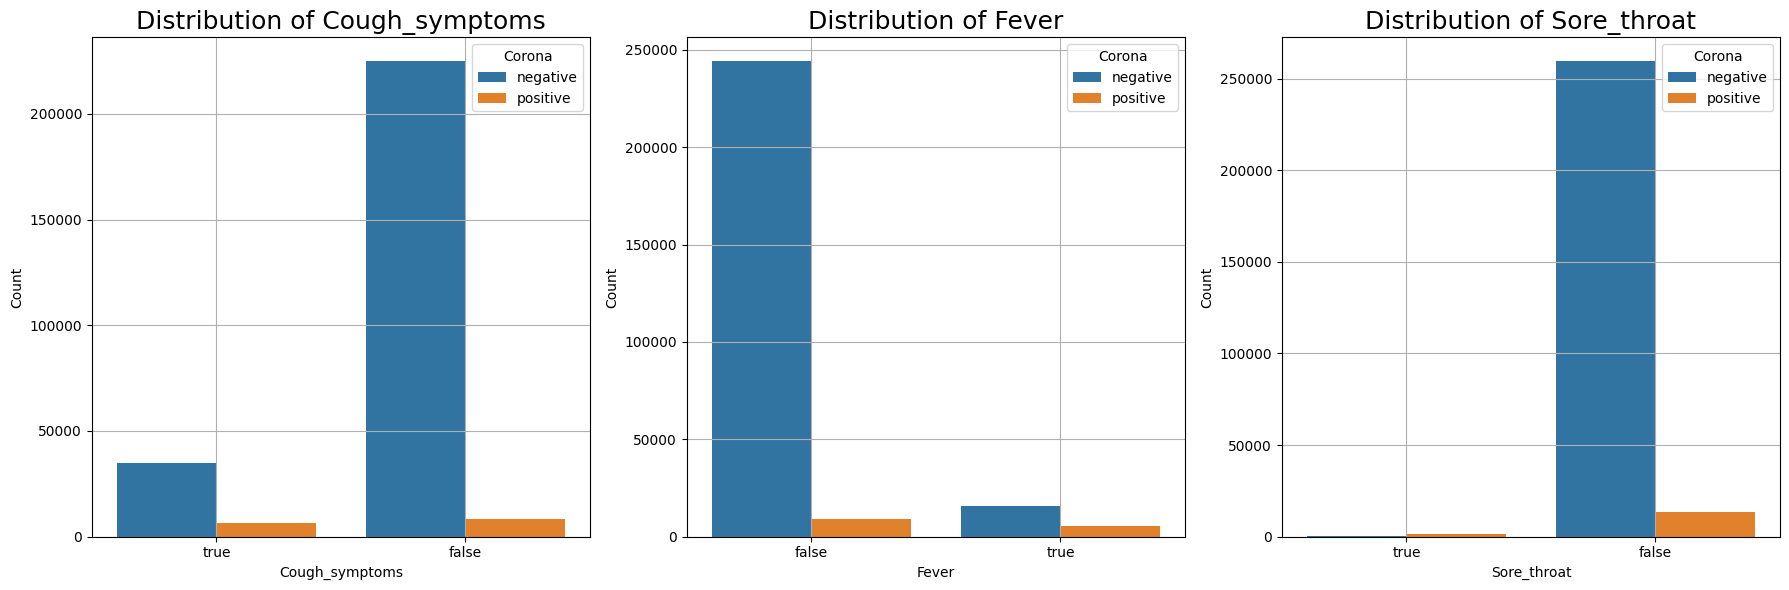

In [ ]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=c_data,x=col, hue='Corona', ax=axes[i] )
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

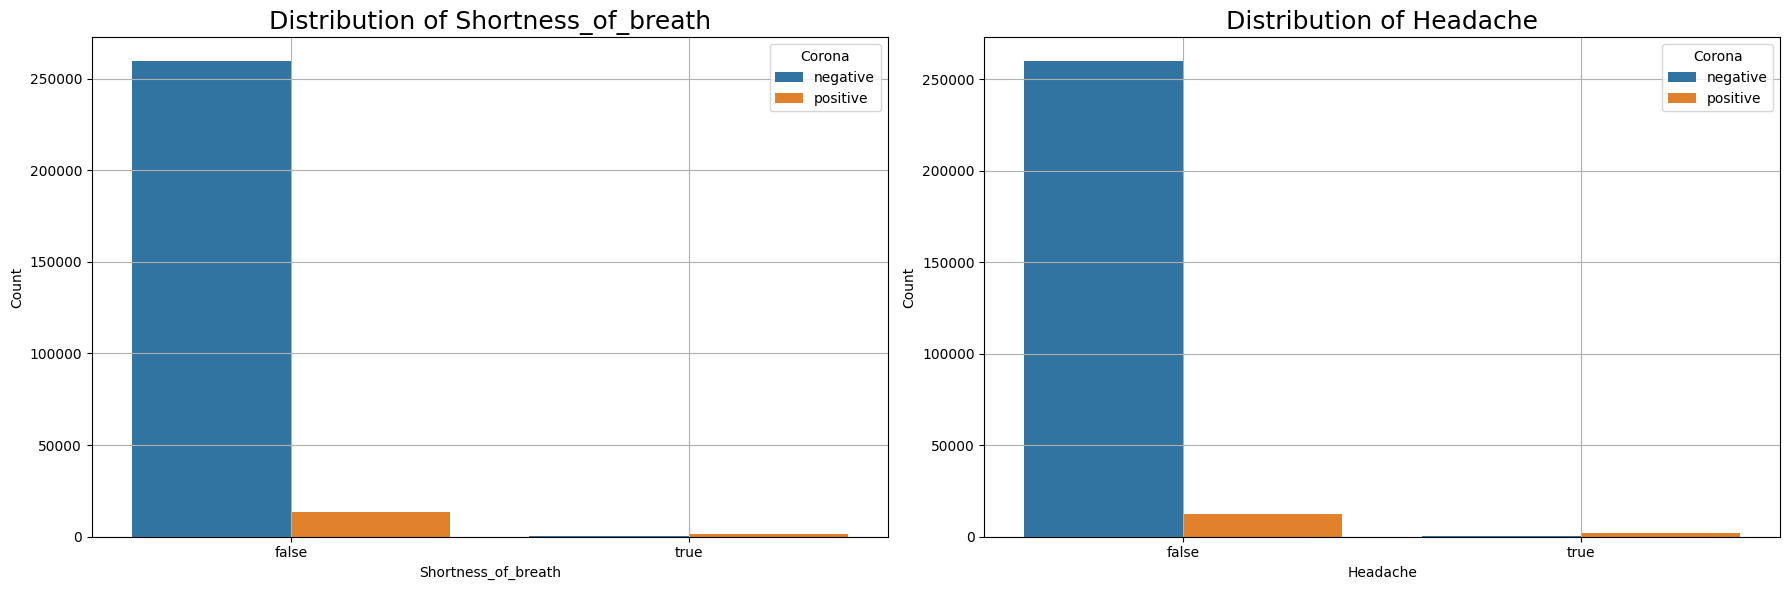

In [ ]:
cols = ['Shortness_of_breath', 'Headache']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=c_data,x=col, hue='Corona', ax=axes[i] )
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

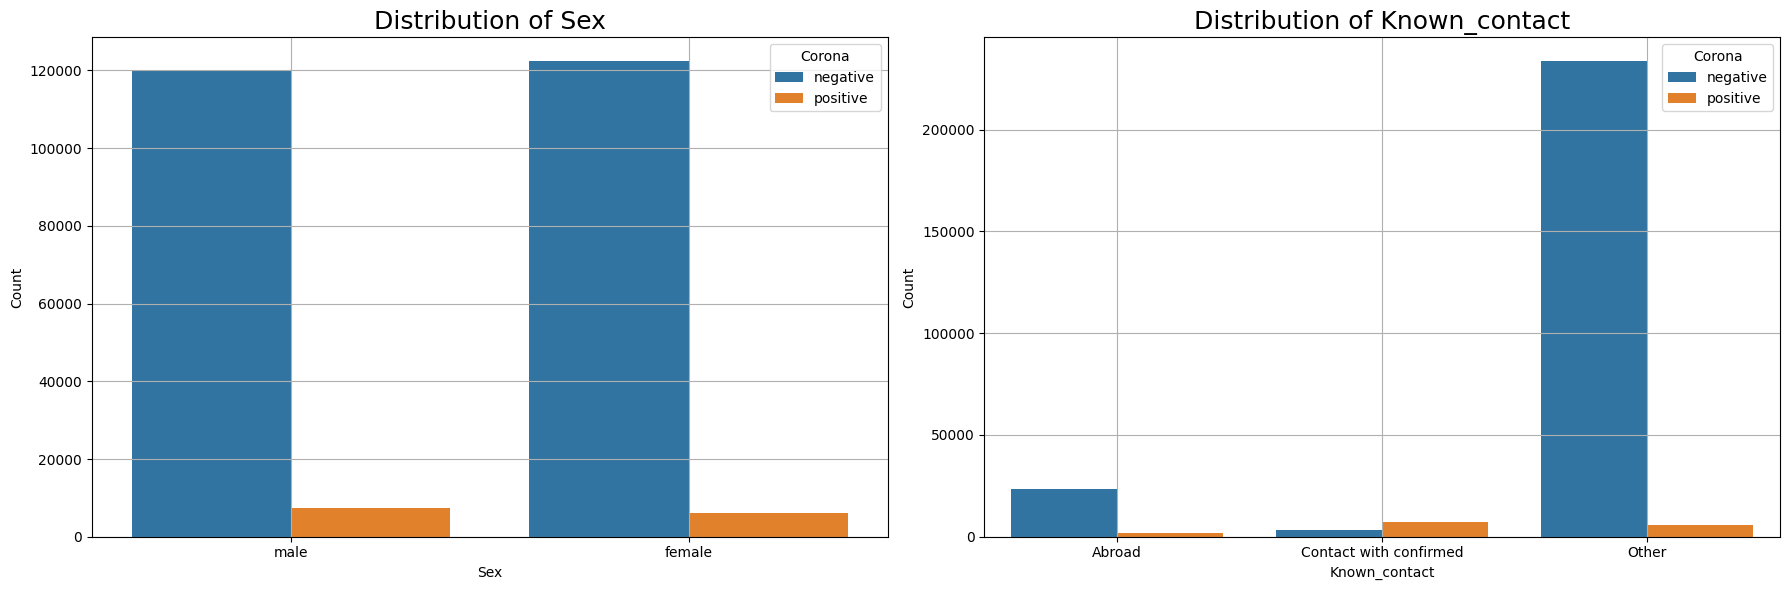

In [ ]:
cols = ['Sex', 'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=c_data,x=col, hue='Corona', ax=axes[i] )
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()



*   Many people tested negative for COVID were also found to have cough symptoms. Same pattern was seen with Fever symptoms as well.
*   Sore throat was seen very less among all people. However, among those who did, the number of positive cases were higher than negative cases.
Same pattern was seen with Headache and shortness of breath.
*   The number of females and males in the dataset is almost evenly distributed.













In [ ]:
covid=c_data.copy(deep='True')

In [ ]:
covid['Sex'].replace({'male':0,'female':1},inplace=True) #replacing male and female with 0 and 1 before imputation so that null values don't get encoded.

In [ ]:
covid.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                  3892
Sex                    19552
Known_contact              0
dtype: int64

In [ ]:
#Dropping the NA values from target variable
covid.dropna(subset=['Corona'],axis=0,inplace=True)

In [ ]:
covid.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    19034
Known_contact              0
dtype: int64

In [ ]:
#Encoding the target variable
from sklearn.preprocessing import LabelEncoder
#Create an instance of the LabelEncoder class
encoder = LabelEncoder()

# Fit and transform the encoder to the dataset
covid["Corona"]=encoder.fit_transform(covid["Corona"])


In [ ]:
#Encoding rest columns using One hot encoding
covid=pd.get_dummies(covid, columns=["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath", "Headache",  "Known_contact"], drop_first=True)

In [ ]:
covid.head()

,Ind_ID,Test_date,Corona,Sex,Cough_symptoms_true,Fever_true,Sore_throat_true,Shortness_of_breath_true,Headache_true,Known_contact_Contact with confirmed,Known_contact_Other
0,1,11-03-2020,0,NaN,1,0,1,0,0,0,0
1,2,11-03-2020,1,NaN,0,1,0,0,0,0,0
2,3,11-03-2020,1,NaN,0,1,0,0,0,0,0
3,4,11-03-2020,0,NaN,1,0,0,0,0,0,0
4,5,11-03-2020,0,NaN,1,0,0,0,0,1,0


In [ ]:
covid.isnull().sum()

Ind_ID                                      0
Test_date                                   0
Corona                                      0
Sex                                     19034
Cough_symptoms_true                         0
Fever_true                                  0
Sore_throat_true                            0
Shortness_of_breath_true                    0
Headache_true                               0
Known_contact_Contact with confirmed        0
Known_contact_Other                         0
dtype: int64

In [ ]:
covid=covid.drop(["Ind_ID", "Test_date"], axis=1)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Corona                                274702 non-null  int64  
 1   Sex                                   255668 non-null  float64
 2   Cough_symptoms_true                   274702 non-null  uint8  
 3   Fever_true                            274702 non-null  uint8  
 4   Sore_throat_true                      274702 non-null  uint8  
 5   Shortness_of_breath_true              274702 non-null  uint8  
 6   Headache_true                         274702 non-null  uint8  
 7   Known_contact_Contact with confirmed  274702 non-null  uint8  
 8   Known_contact_Other                   274702 non-null  uint8  
dtypes: float64(1), int64(1), uint8(7)
memory usage: 8.1 MB


In [ ]:
#Immputation
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5) # calling KNN function
covid.iloc[ : , : ]=knn_imputer.fit_transform(covid)

In [ ]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [ ]:
covid['Sex'] = covid['Sex'].apply(change)

In [ ]:
covid

,Corona,Sex,Cough_symptoms_true,Fever_true,Sore_throat_true,Shortness_of_breath_true,Headache_true,Known_contact_Contact with confirmed,Known_contact_Other
0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
278843,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
278844,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
278845,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
278846,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
covid.nunique()

Corona                                  2
Sex                                     2
Cough_symptoms_true                     2
Fever_true                              2
Sore_throat_true                        2
Shortness_of_breath_true                2
Headache_true                           2
Known_contact_Contact with confirmed    2
Known_contact_Other                     2
dtype: int64

In [ ]:
covid.head()


,Corona,Sex,Cough_symptoms_true,Fever_true,Sore_throat_true,Shortness_of_breath_true,Headache_true,Known_contact_Contact with confirmed,Known_contact_Other
0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Model Training Using Random Forest Classifier

In [ ]:
#Separate features and categorical varialbles
x = covid.drop(["Corona"], axis=1)

y= covid["Corona"]

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
#Fitting Random Forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [ ]:
# Output
print(y_pred)

[0. 0. 1. ... 1. 0. 0.]


In [ ]:
from sklearn.metrics import accuracy_score, make_scorer, recall_score,precision_score,f1_score,roc_curve, auc, confusion_matrix

In [ ]:
# accuracy
Accuracy_RFC = accuracy_score(y_test, y_pred)*100
print("Accuracy:", Accuracy_RFC)

# precision
Precision_RFC = precision_score(y_test, y_pred, average='micro')
print("Precision:", Precision_RFC*100)

# recall
Recall_RFC = recall_score(y_test, y_pred, average='micro')
print("Recall:", Recall_RFC*100)

#  F1 score
f1_RFC = f1_score(y_test, y_pred, average='micro')
print("F1 Score:", f1_RFC*100)

Accuracy: 96.8002038550445
Precision: 96.8002038550445
Recall: 96.8002038550445
F1 Score: 96.8002038550445


Model Training using Logistc Regression

In [ ]:
#Separate features and categorical varialbles
x2 = covid.drop(["Corona"], axis=1)

y2= covid["Corona"]

In [ ]:
### random state train test split will be same with all people using random_state=16
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=16)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x2_train= st_x.fit_transform(x_train)
x2_test= st_x.transform(x_test)

In [ ]:
### Creating a Logistic regression object
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression(random_state = 0)


In [ ]:
### Passing independant and dependant training data to the model
logistic_reg.fit(x2_train,y2_train)

LogisticRegression(random_state=0)

In [ ]:
#Predicting values
logistic_reg_pred=logistic_reg.predict(x2_test)
logistic_reg_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
### accuracy using accuracy_score
Accuracy_LR = accuracy_score(y2_test, logistic_reg_pred)*100
print("Accuracy : ",Accuracy_LR)

#precision score
Precision_LR = precision_score(y2_test, logistic_reg_pred, average='micro')
print("Precision : ",Precision_LR*100)

#Recall Score
Recall_LR = recall_score(y2_test, logistic_reg_pred, average='micro')
print("Recall : ",Recall_LR*100)

#F1 Score
from sklearn.metrics import f1_score
f1_LR=f1_score(y2_test, logistic_reg_pred, average='micro')
print("f1 Score : ",f1_LR*100)

Accuracy :  94.59420105203765
Precision :  94.59420105203765
Recall :  94.59420105203765
f1 Score :  94.59420105203765


Model Training Using

In [ ]:
#Separate features and categorical varialbles
x3 = covid.drop(["Corona"], axis=1)

y3= covid["Corona"]

In [ ]:
# Split dataset into training set and test set
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.20, random_state=102) # 80% training and 20% test

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(x3_train,y3_train)

#Predict the response for test dataset
y3_pred = classification.predict(x3_test)

In [ ]:
Accuracy_train_DT = classification.score(x3_train, y3_train)
print(f"Decision tree training set accuracy: ", Accuracy_train_DT*100)
Accuracy_test_DT = classification.score(x3_test, y3_test)*100
print(f"Decision tree testing set accuracy: ", Accuracy_test_DT)

Decision tree training set accuracy:  96.8242772830484
Decision tree testing set accuracy:  96.80748439234816


In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     51985
         1.0       0.77      0.58      0.66      2956

    accuracy                           0.97     54941
   macro avg       0.87      0.78      0.82     54941
weighted avg       0.97      0.97      0.97     54941



Model Training Using SVM

In [ ]:
#Separate features and categorical varialbles
x4 = covid.drop(["Corona"], axis=1)

y4= covid["Corona"]

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.20,random_state=109) # 80% training and 20% test

In [ ]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x4_train, y4_train)

#Predict the response for test dataset
y4_pred = clf.predict(x4_test)

In [ ]:
cm= confusion_matrix(y4_test, y4_pred)
cm

array([[51272,   696],
       [ 1184,  1789]])

In [ ]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     51968
         1.0       0.72      0.60      0.66      2973

    accuracy                           0.97     54941
   macro avg       0.85      0.79      0.82     54941
weighted avg       0.96      0.97      0.96     54941



In [ ]:
classifier_predictions=clf.predict(x4_test)
Accuracy_SVM=accuracy_score(y4_test, classifier_predictions)*100
print(Accuracy_SVM)

96.57814746728309


Accuracy Graph for Comparing all models

{'Accuracy_RFC': 96.8002038550445, 'Accuracy_LR': 94.59420105203765, 'Accuracy_test_DT': 96.80748439234816, 'Accuracy_SVM': 96.57814746728309}


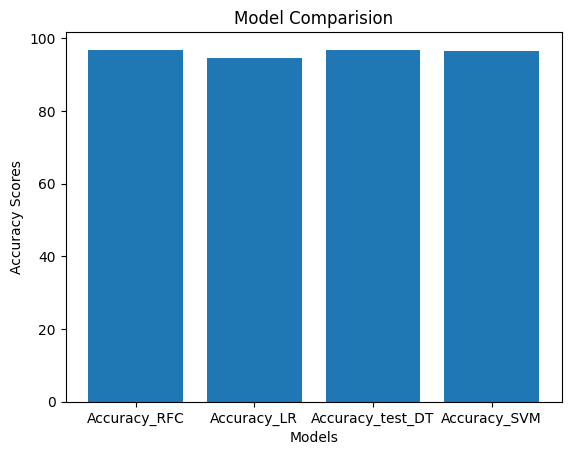

In [ ]:
models={"Accuracy_RFC":Accuracy_RFC, "Accuracy_LR":Accuracy_LR, "Accuracy_test_DT":Accuracy_test_DT, "Accuracy_SVM":Accuracy_SVM}
print(models)
labels=list(models.keys())
values=list(models.values())
plt.bar(labels, height = values)
plt.xlabel("Models")
plt.ylabel("Accuracy Scores")
plt.title("Model Comparision")
plt.show()

# SQL QUERIES

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register("data", data)

In [ ]:
conn.execute("SELECT * FROM data").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020/11/03,true,false,true,false,false,negative,None,None,Abroad
1,2,2020/11/03,false,true,false,false,false,positive,None,None,Abroad
2,3,2020/11/03,false,true,false,false,false,positive,None,None,Abroad
3,4,2020/11/03,true,false,false,false,false,negative,None,None,Abroad
4,5,2020/11/03,true,false,false,false,false,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020/04/30,false,false,false,false,false,positive,None,male,Other
278844,278845,2020/04/30,false,false,false,false,false,negative,None,female,Other
278845,278846,2020/04/30,false,false,false,false,false,negative,None,male,Other
278846,278847,2020/04/30,false,false,false,false,false,negative,None,male,Other


In [ ]:
#Find the number of corona patients who faced shortness of breath.
conn.execute("SELECT COUNT(*) AS Patients_with_shortness_of_breath FROM data WHERE Shortness_of_breath='true';").fetchdf()

,Patients_with_shortness_of_breath
0,1577


In [ ]:
#Find the number of negative corona patients who have fever and sore_throat.
conn.execute("SELECT COUNT(*) as Covid_neg_Patients_with_fever_and_sorethroat FROM data WHERE Corona='negative' AND Fever='true' AND Sore_throat='true';").fetchdf()

,Covid_neg_Patients_with_fever_and_sorethroat
0,121


In [ ]:
data['Test_date']= pd.to_datetime(data['Test_date'])
data.Test_date

0        2020-11-03
1        2020-11-03
2        2020-11-03
3        2020-11-03
4        2020-11-03
            ...    
278843   2020-04-30
278844   2020-04-30
278845   2020-04-30
278846   2020-04-30
278847   2020-04-30
Name: Test_date, Length: 278848, dtype: datetime64[ns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278596 non-null  object        
 3   Fever                278596 non-null  object        
 4   Sore_throat          278847 non-null  object        
 5   Shortness_of_breath  278847 non-null  object        
 6   Headache             278847 non-null  object        
 7   Corona               274956 non-null  object        
 8   Age_60_above         151528 non-null  object        
 9   Sex                  259285 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [ ]:
data['Test_date'] = data['Test_date'].dt.strftime('%Y/%m/%d')
data.Test_date

0         2020/11/03
1         2020/11/03
2         2020/11/03
3         2020/11/03
4         2020/11/03
             ...    
278843    2020/04/30
278844    2020/04/30
278845    2020/04/30
278846    2020/04/30
278847    2020/04/30
Name: Test_date, Length: 278848, dtype: object

In [ ]:
data['Test_date']= pd.to_datetime(data['Test_date'])
data.Test_date

0        2020-11-03
1        2020-11-03
2        2020-11-03
3        2020-11-03
4        2020-11-03
            ...    
278843   2020-04-30
278844   2020-04-30
278845   2020-04-30
278846   2020-04-30
278847   2020-04-30
Name: Test_date, Length: 278848, dtype: datetime64[ns]

In [ ]:
conn.execute("SELECT CAST(Test_date AS DATE) FROM data;").fetchdf()

,CAST(Test_date AS DATE)
0,2020-11-03
1,2020-11-03
2,2020-11-03
3,2020-11-03
4,2020-11-03
...,...
278843,2020-04-30
278844,2020-04-30
278845,2020-04-30
278846,2020-04-30


In [ ]:
conn.execute("SELECT * FROM data").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020/11/03,true,false,true,false,false,negative,None,None,Abroad
1,2,2020/11/03,false,true,false,false,false,positive,None,None,Abroad
2,3,2020/11/03,false,true,false,false,false,positive,None,None,Abroad
3,4,2020/11/03,true,false,false,false,false,negative,None,None,Abroad
4,5,2020/11/03,true,false,false,false,false,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020/04/30,false,false,false,false,false,positive,None,male,Other
278844,278845,2020/04/30,false,false,false,false,false,negative,None,female,Other
278845,278846,2020/04/30,false,false,false,false,false,negative,None,male,Other
278846,278847,2020/04/30,false,false,false,false,false,negative,None,male,Other


In [ ]:
conn.execute("select column_name,data_type from information_schema.columns where table_name = 'data';").fetchdf()

,column_name,data_type
0,Ind_ID,BIGINT
1,Test_date,VARCHAR
2,Cough_symptoms,VARCHAR
3,Fever,VARCHAR
4,Sore_throat,VARCHAR
5,Shortness_of_breath,VARCHAR
6,Headache,VARCHAR
7,Corona,VARCHAR
8,Age_60_above,VARCHAR
9,Sex,VARCHAR


In [ ]:
#Group the data by month and rank the number of positive cases.
conn.execute("SELECT COUNT(Corona) AS Positive_cases, month(CAST(Test_date AS DATE))  AS Month From data WHERE Corona='positive' GROUP BY Month ORDER BY Positive_cases DESC;").fetchdf()

,Positive_cases,Month
0,6283,3
1,4188,4
2,682,1
3,615,2
4,505,5
5,483,7
6,394,6
7,356,10
8,331,11
9,330,12


In [ ]:
#Find the female negative corona patients who faced cough and headache.
conn.execute("SELECT * FROM data WHERE Sex='female' AND Corona='negative' AND Cough_symptoms='true' AND Headache='true';").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,13756,2020/03/22,true,true,true,false,true,negative,No,female,Abroad
1,17289,2020/03/22,true,true,true,false,true,negative,No,female,Abroad
2,17657,2020/03/23,true,false,true,false,true,negative,No,female,Abroad
3,19554,2020/03/23,true,true,false,false,true,negative,No,female,Other
4,19615,2020/03/23,true,false,true,true,true,negative,No,female,Contact with confirmed
5,20248,2020/03/23,true,true,false,false,true,negative,Yes,female,Abroad
6,20253,2020/03/23,true,true,false,false,true,negative,No,female,Contact with confirmed
7,37904,2020/03/27,true,true,true,true,true,negative,No,female,Contact with confirmed
8,40616,2020/03/27,true,false,false,true,true,negative,No,female,Contact with confirmed
9,40752,2020/03/27,true,true,false,false,true,negative,No,female,Contact with confirmed


In [ ]:
#How many elderly corona patients have faced breathing problems?
conn.execute("SELECT COUNT(*) as Elder_patients_with_shortness_of_breath FROM data WHERE Age_60_above='Yes' AND Shortness_of_breath='true';").fetchdf()

,Elder_patients_with_shortness_of_breath
0,292


In [ ]:
#Which three symptoms were more common among COVID positive patients?
conn.execute("SELECT Count(Ind_ID), Cough_symptoms FROM data WHERE Corona='positive' GROUP BY Cough_Symptoms;").fetchdf()


,count(Ind_ID),Cough_symptoms
0,6584,true
1,33,None
2,8112,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Fever FROM data WHERE Corona='positive' GROUP BY Fever;").fetchdf()

,count(Ind_ID),Fever
0,5559,true
1,33,None
2,9137,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Sore_throat FROM data WHERE Corona='positive' GROUP BY Sore_throat;").fetchdf()

,count(Ind_ID),Sore_throat
0,1526,true
1,1,None
2,13202,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Shortness_of_breath FROM data WHERE Corona='positive' GROUP BY Shortness_of_breath;").fetchdf()

,count(Ind_ID),Shortness_of_breath
0,1164,true
1,1,None
2,13564,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Headache FROM data WHERE Corona='positive' GROUP BY Headache;").fetchdf()

,count(Ind_ID),Headache
0,2235,true
1,1,None
2,12493,false


We can see that Cough Symtoms, Fever, and Headache are the most common symptoms.

In [ ]:
#Which symptom was less common among COVID negative people?
conn.execute("SELECT Count(Ind_ID), Cough_symptoms FROM data WHERE Corona='negative' GROUP BY Cough_Symptoms;").fetchdf()

,count(Ind_ID),Cough_symptoms
0,34987,true
1,219,None
2,225021,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Fever FROM data WHERE Corona='negative' GROUP BY Fever;").fetchdf()

,count(Ind_ID),Fever
0,15816,true
1,219,None
2,244192,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Sore_throat FROM data WHERE Corona='negative' GROUP BY Sore_throat;").fetchdf()

,count(Ind_ID),Sore_throat
0,366,true
1,259861,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Shortness_of_breath FROM data WHERE Corona='negative' GROUP BY Shortness_of_breath;").fetchdf()

,count(Ind_ID),Shortness_of_breath
0,385,true
1,259842,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Headache FROM data WHERE Corona='negative' GROUP BY Headache;").fetchdf()

,count(Ind_ID),Headache
0,148,true
1,260079,false


Headache was the least common symptoms among covid negative patients

In [ ]:
#What are the most common symptoms among COVID positive males whose known contact was abroad?
conn.execute("SELECT Count(Ind_ID), Headache FROM data WHERE Corona='positive' AND Sex='male' AND Known_contact='Abroad' GROUP BY Headache;").fetchdf()

,count(Ind_ID),Headache
0,129,true
1,749,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Shortness_of_breath FROM data WHERE Corona='positive' AND Sex='male' AND Known_contact='Abroad' GROUP BY Shortness_of_breath;").fetchdf()

,count(Ind_ID),Shortness_of_breath
0,84,true
1,794,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Fever FROM data WHERE Corona='positive' AND Sex='male' AND Known_contact='Abroad' GROUP BY Fever;").fetchdf()

,count(Ind_ID),Fever
0,407,true
1,471,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Sore_throat FROM data WHERE Corona='positive' AND Sex='male' AND Known_contact='Abroad' GROUP BY Sore_throat;").fetchdf()

,count(Ind_ID),Sore_throat
0,87,true
1,791,false


In [ ]:
conn.execute("SELECT Count(Ind_ID), Cough_symptoms FROM data WHERE Corona='positive' AND Sex='male' AND Known_contact='Abroad' GROUP BY Cough_symptoms;").fetchdf()

,count(Ind_ID),Cough_symptoms
0,532,true
1,346,false


We can see that Fever and cough symptoms were the most common symptoms of Covid positive males whose known contact was abroad